## Impor csv, making a list with dicts, then making a dict which includes dicts

In [56]:
import csv
import matplotlib.pyplot as plt

In [57]:
new_list = []
with open('insurance.csv', newline='') as file:
    dicts = csv.DictReader(file)
    for dict in dicts:
        new_list.append(dict)

In [58]:
#print(new_list)

In [59]:
def new_dict():
    new_dict = {i+1:new_list[i] for i in range(len(new_list))}
    return new_dict
new_dict = new_dict()

### Function 1 test

In [60]:
#print(new_dict)

In [61]:
def num_smokers():
    smokers = {i+1:new_list[i] for i in range(len(new_list)) if new_list[i]['smoker'] == 'yes'}
    return smokers
def num_non_smokers():
    non_smokers = {i+1:new_list[i] for i in range(len(new_list)) if new_list[i]['smoker'] == 'no'}
    return non_smokers
smokers = num_smokers()
non_smokers = num_non_smokers()

### Function 2, 3 tests

In [62]:
#print(smokers)
print(len(smokers))
#print(non_smokers)
print(len(non_smokers))

274
1064


In [63]:
print(f'The number of the people participating in this test is: {len(new_dict)}')

The number of the people participating in this test is: 1338


In [64]:
def numbers_and_ages(sex=None):
    ages_fm = 0
    ages_m = 0
    counter_fm = 0
    for value in new_dict.values():
        if value['sex'] == 'female':
            ages_fm += int(value['age'])
            counter_fm += 1
        elif value['sex'] == 'male':
            ages_m += int(value['age'])
    mean_fm = round(ages_fm / counter_fm, 3)
    counter_m = len(new_dict) - counter_fm
    mean_m = round( ages_m / counter_m, 3)
    s1 = 'In the dataset there are'
    s2 = 'the mean age is'
    if sex == 'female':
        print(s1, counter_fm, sex, 'persons,', s2, mean_fm, 'years')
    elif sex == 'male':
        print(s1, counter_m,sex, 'persons,', s2, mean_m, 'years')
    else:
        print('Invalid data.')

### Function 4 tests:

In [65]:
female_nums_ages = numbers_and_ages('female')
#male_nums_ages = numbers_and_ages('male')
#children_nums_ages = numbers_and_ages('children')
#noones_nums_ages = numbers_and_ages()

In the dataset there are 662 female persons, the mean age is 39.503 years


In [66]:
def living_place(location):
    string = 'The number of habitants living in ' + location
    counter = 0
    for value in new_dict.values():
        if value['region'] == 'southwest':
            counter += 1
    if location == 'southwest':
        print(string, 'is', str(counter))
    elif location == 'northwest':
        print(string, 'is', str(len(new_dict) - counter))
    else:
        print('Invalid data')

### Function 5 tests:

In [67]:
living_place('southwest')
living_place('northwest')
#living_place('someplace')

The number of habitants living in southwest is 325
The number of habitants living in northwest is 1013


In [68]:
def mean_insurance_cost():
    total_cost = 0
    for value in new_dict.values():
        total_cost += int(float(value['charges']))
        mean = total_cost / len(new_dict)
        rounded = round(mean)
    print(f'The average insurance cost is ${rounded:,} regarding the sample')

In [69]:
def insurance_cost(smoker_status='non smoker'):
    str1 = 'The total insurance cost for ' + smoker_status + 's'
    str2 = 'The average insurance cost for ' + smoker_status + 's'
    str3 = 'The average difference between smokers and non smokers is'
    cost_smokers = 0
    cost_non_smokers = 0
    for value in new_dict.values():
        if value['smoker'] == 'yes':
            cost_smokers += int(float(value['charges']))
        elif value['smoker'] == 'no':
            cost_non_smokers += int(float(value['charges']))
    diff = round(cost_smokers/len(smokers) - cost_non_smokers/len(non_smokers))
    if smoker_status == 'smoker':
        return f'''{str1} is ${cost_smokers:,}
{str2} is ${round(cost_smokers/len(smokers)):,}
{str3} ${diff:,}'''
    else:
        return f'''{str1} is ${cost_non_smokers:,}
{str2} is ${round(cost_smokers/len(non_smokers)):,}
{str3} ${diff:,}'''

### Function 6, 7 tests:

In [70]:
mean_insurance_cost()
#print(insurance_cost('smoker'))
print(insurance_cost('non smoker'))
#print(insurance_cost())

The average insurance cost is $13,270 regarding the sample
The total insurance cost for non smokers is $8,973,540
The average insurance cost for non smokers is $8,253
The average difference between smokers and non smokers is $23,616


In [71]:
#print(new_dict)

### Histogram about children distribution and one function about average insurance cost who has at least one child

In [72]:
children = []
for value in new_dict.values():
    children.append(int(value['children']))
    

In [73]:
#children

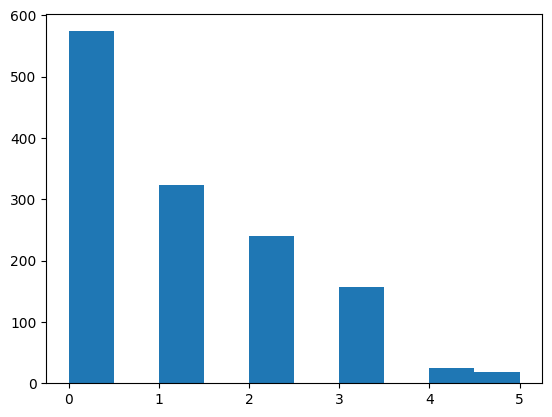

In [74]:
plt.hist(children)
plt.show()

In [75]:
persons_with_children = []
def ins_cost_with_children(status=None):
    total_cost = 0
    if status == 'yes':
        for value in new_dict.values():
            if int(value['children']) > 0:
                persons_with_children.append(int(float(value['charges'])))
                total_cost += int(float(value['charges']))
                mean = total_cost / len(persons_with_children)
                rounded = round(mean)
    print(f'''The average insurance cost for those who has at least one child is ${rounded:,}
The number of the persons who has at least one child is {len(persons_with_children)}''')

In [76]:
ins_cost_with_children('yes')

The average insurance cost for those who has at least one child is $13,949
The number of the persons who has at least one child is 764


In [77]:
#persons_with_children

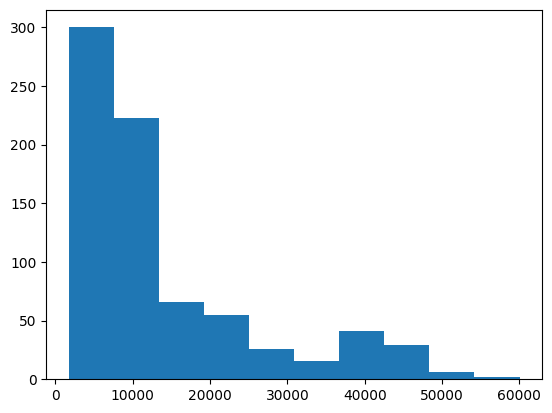

In [78]:
plt.hist(persons_with_children)
plt.show()

### Using pandas

In [79]:
import pandas as pd

In [80]:
df = pd.DataFrame(new_list)

In [81]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.88,0,no,northwest,3866.8552
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
7,37,female,27.74,3,no,northwest,7281.5056
8,37,male,29.83,2,no,northeast,6406.4107
9,60,female,25.84,0,no,northwest,28923.13692


In [82]:
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.6,2,no,southwest,10325.206
1330,57,female,25.74,2,no,southeast,12629.1656
1331,23,female,33.4,0,no,southwest,10795.93733
1332,52,female,44.7,3,no,southwest,11411.685
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.8,0,no,southwest,2007.945
1337,61,female,29.07,0,yes,northwest,29141.3603


In [83]:
df.shape

(1338, 7)

In [84]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [85]:
df.loc[[i for i in range(10)], ['age', 'children', 'bmi']]

,age,children,bmi
0,19,0,27.9
1,18,1,33.77
2,28,3,33
3,33,0,22.705
4,32,0,28.88
5,31,0,25.74
6,46,1,33.44
7,37,3,27.74
8,37,2,29.83
9,60,0,25.84


In [86]:
#print(f"The number of males and females are as follows: {df['sex'].value_counts()}")
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [87]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [88]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [89]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.88,0,no,northwest,3866.8552


In [90]:
def mean_insurance():
    total = 0
    for num in df['charges']:
        total += int(float(num))
        mean = round(total / len(df))
    return mean

In [91]:
mean_insurance = mean_insurance()

In [92]:
print(f'The average insurance cost is ${mean_insurance:,}')

The average insurance cost is $13,270
